john fredy beltran cuellar  
date 08/21/2025

## Probability distribution problems
Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [22]:
from scipy.stats import binom


def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result



In [23]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


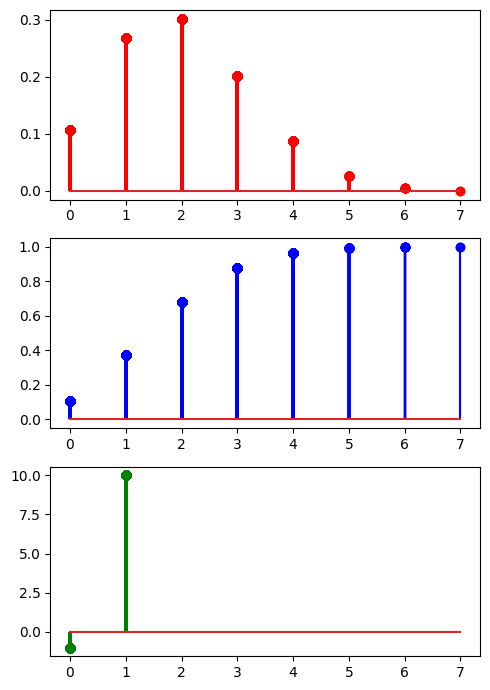

In [24]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### Exercise 1

Write the above functions but for both normal and uniform distributions.


## **distribucion normal**

In [25]:
from scipy.stats import norm
import numpy as np

def dnorm(x, mean=0, std=1): # Función de densidad de probabilidad
    
    return norm.pdf(x, loc=mean, scale=std)# Calcula la estimación puntual de la distribución normal.

def pnorm(q, mean=0, std=1):# Función de distribución acumulada
    
    return norm.cdf(q, loc=mean, scale=std) # Calcula el acumulado de la distribución normal.

def qnorm(p, mean=0, std=1): # Función cuantil
    
    return norm.ppf(p, loc=mean, scale=std) # Calcula el cuantil de la distribución normal.

def rnorm(n, mean=0, std=1): # Generar variables aleatorias
    
    return norm.rvs(loc=mean, scale=std, size=n) # Genera n valores aleatorios a partir de la distribución normal.

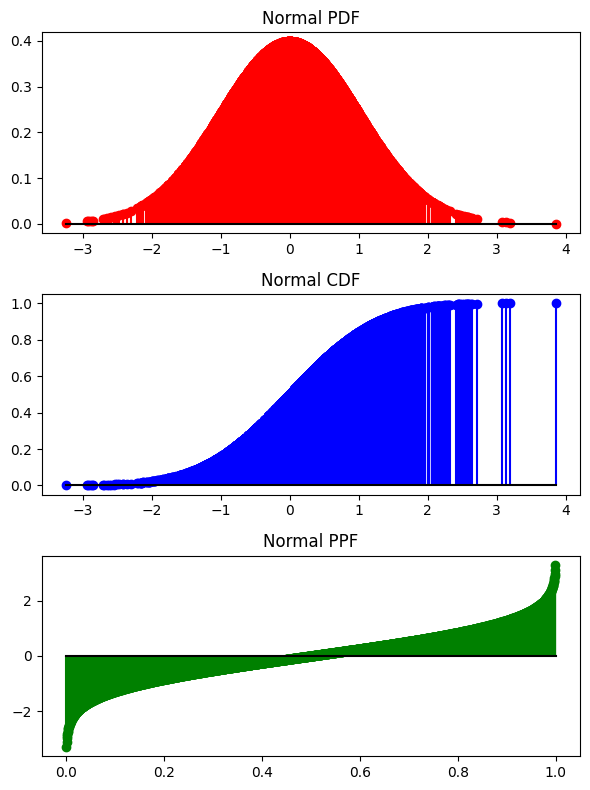

In [26]:
np.random.seed(42)

# Parámetros
mean = 0 
std = 1
n_samples = 2000 # 

data_normal = rnorm(n_samples, mean=mean, std=std) # Generar datos

# Calcular PDF, CDF y PPF
pdf_normal = dnorm(data_normal, mean=mean, std=std)
cdf_normal = pnorm(data_normal, mean=mean, std=std)
ppf_normal = qnorm(np.linspace(0, 1, n_samples), mean=mean, std=std)# PPF requiere valores de probabilidad entre 0 y 1

# Graficar
fig, axes = plt.subplots(3, 1, figsize=(6, 8))

axes[0].stem(data_normal, pdf_normal, linefmt='r-', markerfmt='ro', basefmt='k-')
axes[0].set_title("Normal PDF")

axes[1].stem(data_normal, cdf_normal, linefmt='b-', markerfmt='bo', basefmt='k-')
axes[1].set_title("Normal CDF")

axes[2].stem(np.linspace(0, 1, n_samples), ppf_normal, linefmt='g-', markerfmt='go', basefmt='k-')
axes[2].set_title("Normal PPF")

plt.tight_layout()
plt.show()

## **distribucion uniforme**

In [27]:
from scipy.stats import uniform

def dunif(x, low=0, high=1): # Función de densidad de probabilidad
    
    return uniform.pdf(x, loc=low, scale=high-low) # Calcula la densidad de la distribución uniforme continua.

def punif(q, low=0, high=1): # Función de distribución acumulada

    return uniform.cdf(q, loc=low, scale=high-low) # Calcula el acumulado de la distribución uniforme continua.

def qunif(p, low=0, high=1): # Función cuantil
    
    return uniform.ppf(p, loc=low, scale=high-low) # Calcula el cuantil de la distribución uniforme continua.

def runif(n, low=0, high=1): # Generar variables aleatorias
    
    return uniform.rvs(loc=low, scale=high-low, size=n) # Genera n valores aleatorios a partir de la distribución uniforme continua.

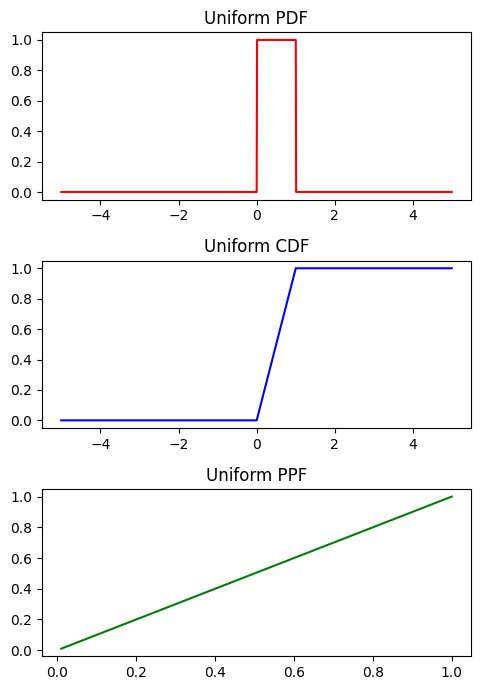

In [28]:
np.random.seed(42)

low = 0
high = 1
data = np.arange(-5, 5, 0.01)

# Calcular PDF, CDF y PPF
pmf = dunif(data, low=low, high=high)
cdf = punif(data, low=low, high=high)
ppf = qunif(data, low=low, high=high)

# Graficar
fig, axis = plt.subplots(3, 1, figsize=(5, 7))
axis[0].plot(data, pmf, "r-")
axis[0].set_title("Uniform PDF")

axis[1].plot(data, cdf, "b-")
axis[1].set_title("Uniform CDF")

axis[2].plot(data, ppf, "g-")
axis[2].set_title("Uniform PPF")

plt.tight_layout()
plt.show()